In [1]:
"""
Author: Vineet Madan
Purpose: Lab Assignment 1 of CS529
Date: 31 August 2019
"""

'\nAuthor: Vineet Madan\nPurpose: Lab Assignment 1 of CS529\nDate: 31 August 2019\n'

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
np.random.seed(0)

In [3]:
#import the datasets (in csv) as pd dataframes
movies_df = pd.read_csv("./ml-latest-small/movies.csv")
ratings_df = pd.read_csv("./ml-latest-small/ratings.csv")

In [4]:
#see the head of the movies dataset
movies_df.head

#give new id(s) to the movies...maps old ids to new ones
new_movie_ids = {}

for index, row in movies_df.iterrows():
    new_movie_ids[int(row['movieId'])] = index

# function to get new movie id
def get_new_movie_id(old_movie_id):
    return new_movie_ids[old_movie_id]

In [5]:
#see the head of the ratings dataset
ratings_df.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp
0            1        1     4.0   964982703
1            1        3     4.0   964981247
2            1        6     4.0   964982224
3            1       47     5.0   964983815
4            1       50     5.0   964982931
5            1       70     3.0   964982400
6            1      101     5.0   964980868
7            1      110     4.0   964982176
8            1      151     5.0   964984041
9            1      157     5.0   964984100
10           1      163     5.0   964983650
11           1      216     5.0   964981208
12           1      223     3.0   964980985
13           1      231     5.0   964981179
14           1      235     4.0   964980908
15           1      260     5.0   964981680
16           1      296     3.0   964982967
17           1      316     3.0   964982310
18           1      333     5.0   964981179
19           1      349     4.0   964982563
20           1      356     4.0   964980962
21

In [6]:
"""
Q1. Plot  a  histogram  to  show  the  variation  of  the  number  of  user  ratings  per movie  in  the  dataset
"""
#number of ratings per movie
number_of_ratings_per_movie_dict = {}
for index, row in movies_df.iterrows():
    number_of_ratings_per_movie_dict[row['movieId']] = 0
for index, row in ratings_df.iterrows():
    number_of_ratings_per_movie_dict[row['movieId']]+=1

In [7]:
#function to get name of a movie with a movie_id
def get_movie_name_by_id(movie_id):
    for index, row in movies_df.iterrows():
        if row['movieId']==movie_id:
            return row['title']
    return None

In [8]:
num_movies = len(movies_df)
num_users = 610

In [9]:
#number_of_ratings_per_movie_dict has the [movie_id, ratings per movie]

In [10]:
number_of_ratings_per_movie_dict

{1: 215,
 2: 110,
 3: 52,
 4: 7,
 5: 49,
 6: 102,
 7: 54,
 8: 8,
 9: 16,
 10: 132,
 11: 70,
 12: 19,
 13: 8,
 14: 18,
 15: 13,
 16: 82,
 17: 67,
 18: 20,
 19: 88,
 20: 15,
 21: 89,
 22: 36,
 23: 16,
 24: 28,
 25: 76,
 26: 13,
 27: 9,
 28: 11,
 29: 38,
 30: 3,
 31: 38,
 32: 177,
 34: 128,
 36: 67,
 38: 4,
 39: 104,
 40: 2,
 41: 15,
 42: 7,
 43: 8,
 44: 46,
 45: 32,
 46: 15,
 47: 203,
 48: 68,
 49: 1,
 50: 204,
 52: 28,
 53: 2,
 54: 3,
 55: 1,
 57: 8,
 58: 37,
 60: 34,
 61: 6,
 62: 80,
 63: 7,
 64: 5,
 65: 31,
 66: 9,
 68: 5,
 69: 20,
 70: 55,
 71: 5,
 72: 7,
 73: 13,
 74: 8,
 75: 5,
 76: 15,
 77: 1,
 78: 3,
 79: 17,
 80: 2,
 81: 14,
 82: 8,
 83: 1,
 85: 7,
 86: 15,
 87: 7,
 88: 16,
 89: 10,
 92: 8,
 93: 9,
 94: 10,
 95: 84,
 96: 1,
 97: 10,
 99: 2,
 100: 14,
 101: 23,
 102: 5,
 103: 3,
 104: 99,
 105: 23,
 106: 1,
 107: 26,
 108: 1,
 110: 237,
 111: 104,
 112: 46,
 113: 3,
 116: 5,
 117: 1,
 118: 2,
 119: 2,
 121: 2,
 122: 16,
 123: 4,
 125: 12,
 126: 7,
 128: 1,
 129: 1,
 132: 6,
 135:

In [11]:
#get the new indices and then plot
number_of_ratings_per_movie_new_indices = []

In [12]:
#then iterate through the values of the dict number_of_ratings_per_movie_dict
for val in number_of_ratings_per_movie_dict.values():
    number_of_ratings_per_movie_new_indices.append(val)

In [13]:
#function to create the rating matrix
def create_the_rating_matrix(movies_df, num_movies, num_users):
    full_ratings_mat = np.empty(shape=(num_users+1, num_movies))
    full_ratings_mat.fill(np.nan)
    #iterate through the movies_df
    for index, row in ratings_df.iterrows():
        new_movie_id = int(get_new_movie_id(row['movieId']))
        user_id = int(row['userId'])
        full_ratings_mat[user_id][new_movie_id] = row['rating']
    full_ratings_mat=full_ratings_mat[1:]
        
    return full_ratings_mat
    

ratings_matrix = create_the_rating_matrix(movies_df, num_movies, num_users)


In [14]:
full_ratings_matrix = ratings_matrix[1:]

(array([8.936e+03, 5.230e+02, 1.430e+02, 7.200e+01, 3.000e+01, 1.800e+01,
        1.200e+01, 3.000e+00, 2.000e+00, 3.000e+00]),
 array([  0. ,  32.9,  65.8,  98.7, 131.6, 164.5, 197.4, 230.3, 263.2,
        296.1, 329. ]),
 <a list of 10 Patch objects>)

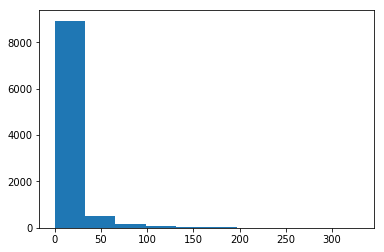

In [15]:
plt.hist(number_of_ratings_per_movie_new_indices)

In [16]:
"""
Q2. Plot the number of movies rated by each user 
"""
number_of_movies_rated_by_each_user = []

#set all the userID(s) number of mvoies rated to 0
for user_id in range(1, 611):
    number_of_movies_rated_by_each_user.append(0)

for index, row in ratings_df.iterrows():
    number_of_movies_rated_by_each_user[int(row['userId'])-1]+=1

(array([520.,  54.,  15.,  12.,   5.,   0.,   1.,   1.,   0.,   2.]),
 array([  20. ,  287.8,  555.6,  823.4, 1091.2, 1359. , 1626.8, 1894.6,
        2162.4, 2430.2, 2698. ]),
 <a list of 10 Patch objects>)

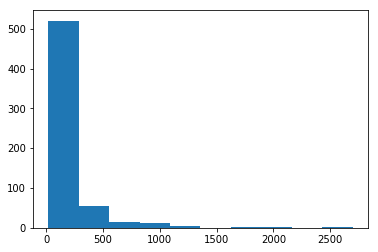

In [17]:
# plot the movies_rated_by_each_user
plt.hist(number_of_movies_rated_by_each_user)

In [18]:
"""
Q3. Number of ratings per movie ... get the 100 most popular ones by most ratings criteria
"""
hundred_most_popular_by_id = sorted(number_of_ratings_per_movie_dict.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)[0:100]
hundred_most_popularity_by_name =  []

for movie_id, num_of_ratings in hundred_most_popular_by_id:
    movie_name = get_movie_name_by_id(movie_id)
    hundred_most_popularity_by_name.append(movie_name)
    
hundred_most_popularity_by_name

['Forrest Gump (1994)',
 'Shawshank Redemption, The (1994)',
 'Pulp Fiction (1994)',
 'Silence of the Lambs, The (1991)',
 'Matrix, The (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Jurassic Park (1993)',
 'Braveheart (1995)',
 'Terminator 2: Judgment Day (1991)',
 "Schindler's List (1993)",
 'Fight Club (1999)',
 'Toy Story (1995)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'American Beauty (1999)',
 'Usual Suspects, The (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Independence Day (a.k.a. ID4) (1996)',
 'Apollo 13 (1995)',
 'Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)',
 'Lord of the Rings: The Fellowship of the Ring, The (2001)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Godfather, The (1972)',
 'Fugitive, The (1993)',
 'Batman (1989)',
 'Lord of the Rings: The Two Towers, The (2002)',
 'Saving Private Ryan (1998)',
 'Lord of the Rings: The Return of the King, The (2003)',
 'Aladdin (1992)',
 'Fargo (1996)',


In [236]:
#functions to compute the accuracy 
#1. uses Root Mean Squared Error
def get_rmse(predicted_rating_matrix, test_rating_matrix):
    num_users = test_rating_matrix.shape[0]
    num_movies = test_rating_matrix.shape[1]
    
    error = 0.0
    
    num_calcs = 0
    
    for user_id in range(num_users):
        for movie_id in range(num_movies):
            if np.isnan(test_rating_matrix[user_id][movie_id])==False and np.isnan(predicted_rating_matrix[user_id][movie_id])==False:
                diff = abs(predicted_rating_matrix[user_id][movie_id]-test_rating_matrix[user_id][movie_id])
#                 print(diff)
                error = error + diff*diff
                num_calcs+=1
#     print("Number Calculated - {}".format(num_calcs))
    return np.sqrt(error)

#2. uses Mean Absolute Error
def get_mae(predicted_rating_matrix, test_rating_matrix):
    num_users = test_rating_matrix.shape[0]
    num_movies = test_rating_matrix.shape[1]
    
    error = 0.0
    
    num_calcs = 0
    
    for user_id in range(num_users):
        for movie_id in range(num_movies):
            if np.isnan(test_rating_matrix[user_id][movie_id])==False and np.isnan(predicted_rating_matrix[user_id][movie_id])==False:
                diff = abs(predicted_rating_matrix[user_id][movie_id]-test_rating_matrix[user_id][movie_id])
#                 print(diff)
                error = error + diff
                num_calcs+=1
#     print("Number Calculated - {}".format(num_calcs))
    return error

#function to get the mean center of the rating matrix
def get_mean_centered(input_rating_matrix):
    num_users = input_rating_matrix.shape[0]
    mean_centered_rating_matrix = np.empty(shape=input_rating_matrix.shape)
    for user_id in range(num_users):
        mean_centered_rating_matrix[user_id] = input_rating_matrix[user_id]-np.nanmean(input_rating_matrix[user_id])
    return mean_centered_rating_matrix

# function to split the dataset intro train, test
def split_the_dset(input_rating_matrix, train_ratio=70.0, mean_center=False):
    #sample from a uniform distribution to prepare a 
    np.random.seed(0) ;
    mask = np.random.uniform(low=0.0, high=100.0, size=input_rating_matrix.shape)
    #set the curoff at train ratio
    mask = mask<=train_ratio
    
    train_rating_matrix = np.empty(shape=input_rating_matrix.shape)
    train_rating_matrix.fill(np.nan)

    test_rating_matrix = np.empty(shape=input_rating_matrix.shape)
    test_rating_matrix.fill(np.nan)

    #loop through the elments of the input training matrix
    for user in range(input_rating_matrix.shape[0]):
        for item in range(input_rating_matrix.shape[1]):
            if mask[user][item]==True and input_rating_matrix[user][item]!=np.nan:
                train_rating_matrix[user][item] = input_rating_matrix[user][item]
            elif mask[user][item]==False and input_rating_matrix[user][item]!=np.nan:
                test_rating_matrix[user][item] = input_rating_matrix[user][item]

    return train_rating_matrix, test_rating_matrix

        

#this function returns a dict where key is the id of the user and the value is  a list of rated movie tuples ... 
#so a list of (movie_id, rating_for_movie)
def get_compress_training_rating_matrix(train_rating_matrix):
    num_users = train_rating_matrix.shape[0]
    num_movies = train_rating_matrix.shape[1]
    compressed_train_rating_matrix = {}
    for user_num in range(num_users):
        compressed_train_rating_matrix[user_num] = {}
    for user_id in range(num_users):
        for movie_id in range(num_movies):
            if not np.isnan(train_rating_matrix[user_id][movie_id]):
                compressed_train_rating_matrix[user_id][movie_id] = train_rating_matrix[user_id][movie_id]
    return compressed_train_rating_matrix

#function to get the pearson similairty from two users 
def get_pearson_similarity(user_u, user_v):
    if len(user_u)==0 or len(user_v)==0: return np.nan
    #calculate the mean of the ratings of user_u and user_v
    mean_u = np.nanmean(user_u)
    mean_v = np.nanmean(user_v)

    #now go through the intersection of the user_u and user_v
    num = 0.0
    dem1 = 0.0
    dem2 = 0.0
    for i in range(user_u.shape[0]):
        num = num + (user_u[i]-mean_u)*(user_v[i]-mean_v)
        dem1 = dem1 + np.square(user_u[i]-mean_u)
        dem2 = dem2 +np.square(user_v[i]-mean_v)
#     print(num, dem1, dem2)
    return num/(np.sqrt(dem1)*np.sqrt(dem2))

#function to get the cosine similairty from two users 
def get_cosine_similarity(user_u, user_v):
    if len(user_u)==0 or len(user_v)==0: return np.nan
    num = 0.0
    dem1 = 0.0
    dem2 = 0.0
    for i in range(user_u.shape[0]):
        num = num + user_u[i]*user_v[i]
        dem1 = dem1 + np.square(user_u[i])
        dem2 = dem2 + np.square(user_v[i])
#     print(num, dem1, dem2)
    return num/(np.sqrt(dem1)*np.sqrt(dem2))

#function to get pearson similarity from compressed form of the two sets of the user(s)
def get_pearson_similarity_compressed(user_u, user_v):
    #user_u and user_v are dicts themselves
    #iterate through the user_u keys
    rated_by_both = [[], []]
    for item_id in user_u.keys():
        #check if that item is rated by user_v
        if item_id in user_v.keys():
            rated_by_both[0].append(user_u[item_id])
            rated_by_both[1].append(user_v[item_id])
    #store the rated_by_both list as a numpy array and then call the get_pearson_similarity function on it
    rated_by_both_np = np.array(rated_by_both)
   
    return get_pearson_similarity(rated_by_both_np[0], rated_by_both_np[1])

#function to get pearson similarity from compressed form of the two sets of the user(s)
def get_cosine_similarity_compressed(user_u, user_v):
    #user_u and user_v are dicts themselves
    #iterate through the user_u keys
    rated_by_both = [[], []]
    for item_id in user_u.keys():
        #check if that item is rated by user_v
        if item_id in user_v.keys():
            rated_by_both[0].append(user_u[item_id])
            rated_by_both[1].append(user_v[item_id])
    #store the rated_by_both list as a numpy array and then call the get_pearson_similarity function on it
    rated_by_both_np = np.array(rated_by_both)
    
    return get_cosine_similarity(rated_by_both_np[0], rated_by_both_np[1])

In [233]:
"""
Cell for testing the above functions
"""
# sample_rm = np.array([[1, 2,np.nan], [4,4, 10]])
# get_mean_centered(sample_rm)
"""
Get the mean centered rating matrix using the get_mean_centered function
"""
mean_centered_ratings_matrix = get_mean_centered(ratings_matrix)
rm = {}
rm[0] = {614: 2.0, 616:2.0, 618:1.0}
rm[1] = {614: 2.0, 616:2.0, 618:5.0}

get_pearson_similarity_compressed(rm[0], rm[1]), get_cosine_similarity_compressed(rm[0], rm[1])

(-1.0000000000000002, 0.7543365091413573)

In [216]:
#function returns number of non-nan elements in matrix
def get_num_non_nan(mat):
    rows = mat.shape[0]
    cols = mat.shape[1]
    res =0
    for row in range(rows):
        for col in range(cols):
            if np.isnan(mat[row][col])==False:
                res+=1
    return res

In [217]:
train_rating_matrix, test_rating_matrix = split_the_dset(ratings_matrix)
mean_centered_train_rating_matrix, mean_centered_test_rating_matrix = split_the_dset(mean_centered_ratings_matrix)

In [218]:
get_num_non_nan(train_rating_matrix), get_num_non_nan(test_rating_matrix)

(70704, 30132)

In [219]:
compressed_train_rating_matrix = get_compress_training_rating_matrix(train_rating_matrix)
mean_centered_compressed_train_rating_matrix = get_compress_training_rating_matrix(mean_centered_train_rating_matrix)

In [220]:
"""
function to get pairwise similarity from the compressed train rating matrix
params:
---pearson: uses pearson similarity coefficient if True ... cosine similarity if False
"""
def get_user_similarity_matrix(compressed_train_rating_matrix,  pearson = True, chk_interval=300):
    #make a similarity matrix of size [user, user]
    num_users = len(compressed_train_rating_matrix)
#     print(num_users)
    uu_mat = np.empty(shape=(num_users, num_users))
    uu_mat.fill(0)
    #get similarity of all the users

    for u in range(num_users):
        if u%chk_interval==0:
            print(u)
        for v in range(num_users):
            I_u = compressed_train_rating_matrix[u]
            I_v = compressed_train_rating_matrix[v]
#             print(I_u)
            if pearson==True:
                uu_mat[u][v] = get_pearson_similarity_compressed(I_u, I_v)
            else:
                uu_mat[u][v] = get_cosine_similarity_compressed(I_u, I_v)
    return uu_mat

In [221]:
#pearson uu similarity matrix
pearson_uu_mat = get_user_similarity_matrix(compressed_train_rating_matrix, pearson=True)
#pearson uu similarity matrix using mean centering
mean_centered_pearson_uu_mat = get_user_similarity_matrix(mean_centered_compressed_train_rating_matrix, pearson=True)
#cosine uu similarity matrix
cosine_uu_mat = get_user_similarity_matrix(compressed_train_rating_matrix, pearson=False)

0


/home/vineet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:102: RuntimeWarning: invalid value encountered in double_scalars


300
600
0
300
600
0
300
600


In [264]:
"""
Functions for prediction
"""
def get_top_k(uu_mat, train_rating_matrix, user_id, movie_id, k):
    #iterate through a users row and get the column ids of the k most similar
    num_users = uu_mat.shape[0]
    top_k = {}#key is the other users_id and the value is (similarity of this user with other, rating of movie_id by other)
    for other_id in range(num_users):
        #check if user and other have a similarity computed and also whether other has rated for this item
        if np.isnan(uu_mat[user_id][other_id])==False and user_id!=other_id and np.isnan(train_rating_matrix[other_id][movie_id])==False:
            top_k[other_id] = (uu_mat[user_id][other_id], train_rating_matrix[other_id][movie_id])
    #sort the top_k dict according to most similarity that is the values of top_k dict
    
    top_k = sorted(top_k.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)

    return collections.OrderedDict(top_k)

def get_prediction(uu_mat, train_rating_matrix, user_id, movie_id, k, mean_centered=False, full_train_rating_matrix=None):
    top_k = get_top_k(uu_mat, train_rating_matrix, user_id, movie_id, k)

#     print("\n")
    #if no users are matching .... then return 2.5 randomly
    if len(top_k)==0: return 2.5
    #if there are top_k users
    num = 0.0
    den = 0.0
    
    num_counted = 0
#     print(type(top_k))
    for item in top_k.values():
#         print(item)
        sim = item[0]
        rating = item[1]
        if num_counted==k:break
        num = num + sim*rating
        den = den + abs(sim)
        num_counted+=1
    
    if mean_centered==False:
        return num/den
    else:
        mean_u = np.nanmean(full_train_rating_matrix[user_id])
#         print("mean ", mean_u, mean_u + (num/den))
        return  mean_u + (num/den)

In [265]:
def predict_whole(uu_mat, train_rating_matrix, test_rating_matrix, K, mean_centered=False, full_train_rating_matrix=None):
    num_users = test_rating_matrix.shape[0]
    num_movies = test_rating_matrix.shape[1]
    
    predicted_rating_matrix = np.empty(test_rating_matrix.shape)
    predicted_rating_matrix.fill(np.nan)
    
    for user_id in range(num_users):
        for movie_id in range(num_movies):
            if np.isnan(test_rating_matrix[user_id][movie_id])==False:
                predicted_rating_matrix[user_id][movie_id] = get_prediction(uu_mat, train_rating_matrix, user_id, movie_id, K, mean_centered=mean_centered, full_train_rating_matrix=full_train_rating_matrix)
    #returns the prediction matrix
    return predicted_rating_matrix

In [238]:
"""
Q4. Do the user-neighborhood based predictions
    Find the appropriate K
"""

#1. Prediction using pearson similarity without mean centering
results_pearson = {}
for k in range(1, 11):
    pred_mat_uu_pearson = predict_whole(pearson_uu_mat, train_rating_matrix, test_rating_matrix, K=k)
    mae = get_mae(pred_mat_uu_pearson, test_rating_matrix)
    rmse = get_rmse(pred_mat_uu_pearson, test_rating_matrix)
    print("K={}; mae={}, rmse={}".format(k, mae, rmse))
    results_pearson[k] = (mae, rmse)

/home/vineet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in double_scalars


K=1; mae=30511.0, rmse=243.19539469323837
K=2; mae=28079.126059284255, rmse=225.90605662966007
K=3; mae=27388.631296646654, rmse=223.78881967209313
K=4; mae=27193.758071667242, rmse=225.0953036906732
K=5; mae=27179.67020152852, rmse=226.79170811249145
K=6; mae=27352.477471578164, rmse=229.60416545822423
K=7; mae=27562.03441574602, rmse=232.56760957930277
K=8; mae=27827.043636807848, rmse=235.50866627513025
K=9; mae=28119.357504569336, rmse=238.22528393725722
K=10; mae=28432.39782708916, rmse=240.96689672513514


In [ ]:
#2. Prediction using pearson similarity without mean centering
results_pearson_with_mean_centering = {}
for k in range(1, 11):
    pred_mat_uu_pearson_mean_centering = predict_whole(mean_centered_pearson_uu_mat, mean_centered_train_rating_matrix, test_rating_matrix, K=k, mean_centered=True, full_train_rating_matrix=train_rating_matrix)
    mae = get_mae(pred_mat_uu_pearson_mean_centering, test_rating_matrix)
    rmse = get_rmse(pred_mat_uu_pearson_mean_centering, test_rating_matrix)
    print("K={}; mae={}, rmse={}".format(k, mae, rmse))
    results_pearson_with_mean_centering[k] = (mae, rmse)

/home/vineet/.local/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in double_scalars


K=1; mae=27645.050306667807, rmse=205.34904657429067
K=2; mae=24528.489619426466, rmse=181.7631537121451
K=3; mae=23277.70735743458, rmse=173.35945980674936


In [ ]:
#3. Prediction using cosine similarity without mean centering
results_cosine = {}
for k in range(1, 11):
    pred_mat_uu_cosine = predict_whole(uu_mat=sine_uu_mat_uu_mat, train_rating_matrix, test_rating_matrix, K=k)
    mae = get_mae(pred_mat_uu_cosine, test_rating_matrix)
    rmse = get_rmse(pred_mat_uu_cosine, test_rating_matrix)
    print("K={}; mae={}, rmse={}".format(k, mae, rmse))
    results_cosine[k] = (mae, rmse)